In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’


Warning message in install.packages("car"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”


In [ ]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




In [ ]:
#importing dataset
df <- datasets::mtcars
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
# structure of dataset
str(df)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [ ]:
dim(df)
summary(df)

[1] 32 11

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [ ]:
## 75% of the sample size
smp_size <- floor(0.85 * nrow(mtcars))

## set the seed to make your partition reproducible
# it"s helpful to generate random number
set.seed(123)
train_ind <- sample(seq_len(nrow(mtcars)), size = smp_size)

train <- mtcars[train_ind, ]
test <- mtcars[-train_ind, ]

In [ ]:
head(train)
dim(train)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


[1] 27 11

In [ ]:
head(test)
dim(test)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4


[1]  5 11

In [ ]:
# Apply the lm() function.
linear <- lm(mpg ~ wt, data=train)
linear



Call:
lm(formula = mpg ~ wt, data = train)

Coefficients:
(Intercept)           wt  
     37.992       -5.589  


In [ ]:
summary(linear)


Call:
lm(formula = mpg ~ wt, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4749 -2.7627 -0.0659  1.5922  6.7039 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.9916     2.2019  17.254 2.13e-15 ***
wt           -5.5889     0.6828  -8.185 1.54e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.289 on 25 degrees of freedom
Multiple R-squared:  0.7282,	Adjusted R-squared:  0.7174 
F-statistic:    67 on 1 and 25 DF,  p-value: 1.544e-08


In [ ]:
summary(linear)


Call:
lm(formula = mpg ~ wt, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4749 -2.7627 -0.0659  1.5922  6.7039 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.9916     2.2019  17.254 2.13e-15 ***
wt           -5.5889     0.6828  -8.185 1.54e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.289 on 25 degrees of freedom
Multiple R-squared:  0.7282,	Adjusted R-squared:  0.7174 
F-statistic:    67 on 1 and 25 DF,  p-value: 1.544e-08


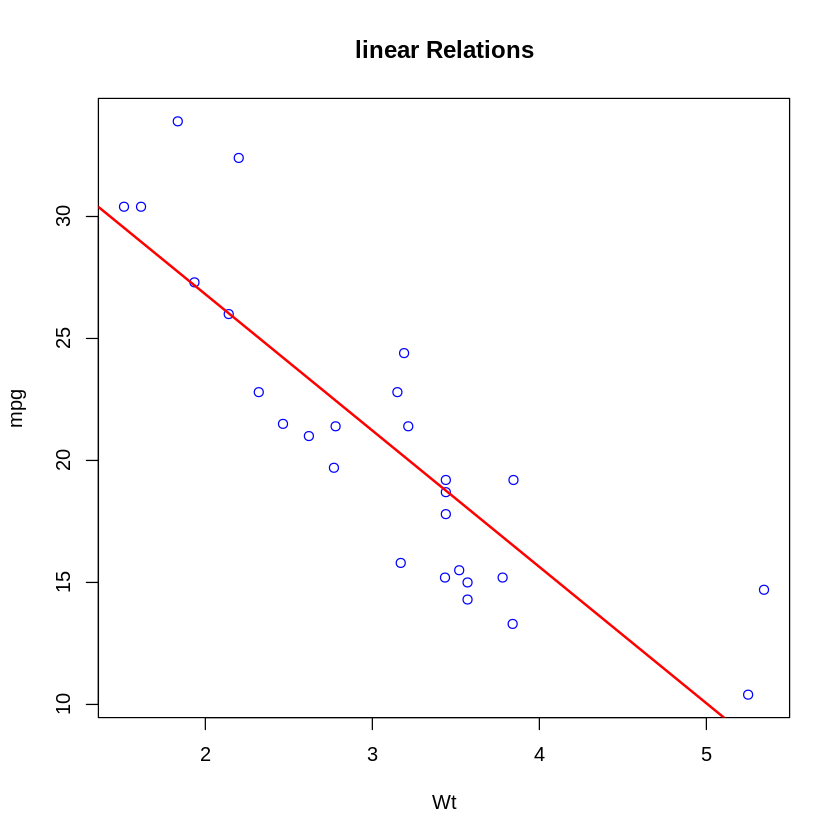

In [ ]:
# Plot the line of regression
plot(mpg ~ wt, data = train, col="blue", main='linear Relations', xlab = "Wt",ylab = "mpg")
abline(linear, col="red", lwd=2)
msg<-"line of regression"
mtext(msg, 3, line=-4) 

In [ ]:
#predicting model on test data
result <- predict.lm(linear, data.frame(wt = test$wt))
cat("Predicted\tActual\n")
for(i in 1:nrow(test)) {
    cat(result[i], "\t" ,test$mpg[i], "\n")
}

Predicted	Actual
21.92358 	 21 
18.65408 	 18.1 
15.24486 	 16.4 
17.14508 	 17.3 
7.67751 	 10.4 


In [ ]:
cat("RMSE: ", sqrt(mean((test$mpg - result)**2)))

RMSE:  1.409277

MULTIPLE REGRESSION

In [23]:
# Apply the lm() function.
multiple <- lm(mpg ~ disp + hp + drat, data=train)
multiple

bs <- round(coef(multiple), 3)

msg <- paste0("mpg = ", bs[1], 
             ifelse(sign(bs[2])==1, " + ", " - "), abs(bs[2]), " disp ",
             ifelse(sign(bs[3])==1, " + ", " - "), abs(bs[3]), " hp ",
             ifelse(sign(bs[4])==1, " + ", " - "), abs(bs[4]), "drat")

cat("\nRelationship:  ")
cat(msg)


Call:
lm(formula = mpg ~ disp + hp + drat, data = train)

Coefficients:
(Intercept)         disp           hp         drat  
   20.27371     -0.01836     -0.03323      2.53735  



Relationship:  mpg = 20.274 - 0.018 disp  - 0.033 hp  + 2.537drat

In [24]:
summary(multiple)


Call:
lm(formula = mpg ~ disp + hp + drat, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2562 -2.0207 -0.4833  1.8266  6.3838 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 20.27371    8.03409   2.523   0.0190 *
disp        -0.01836    0.01100  -1.669   0.1087  
hp          -0.03323    0.01481  -2.243   0.0348 *
drat         2.53735    1.85948   1.365   0.1856  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.244 on 23 degrees of freedom
Multiple R-squared:  0.7567,	Adjusted R-squared:  0.725 
F-statistic: 23.84 on 3 and 23 DF,  p-value: 3.037e-07


In [30]:
# Plot the line of regression


install.packages(avPlots)
avPlots(multiple)
cat(msg)

ERROR: ignored

In [31]:
result <- predict.lm(multiple, data.frame(disp = test$disp, hp = test$hp, drat = test$drat ))
cat("Predicted\tActual\n")
for(i in 1:nrow(test)) {
    cat(result[i], "\t" ,test$mpg[i], "\n")
}

Predicted	Actual
23.57697 	 21 
19.65732 	 18.1 
17.01913 	 16.4 
17.01913 	 17.3 
12.29709 	 10.4 


In [32]:
cat("RMSE: ", sqrt(mean((test$mpg - result)**2)))

RMSE:  1.620321

 Curvilinear Regression

In [33]:
# create a squared term for quadratic curvilinear regression
train$hp2 <- train$hp^2 
test$hp2 <- test$hp^2 
head(train)
head(test)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,hp2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,112225
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,42025
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,2704
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3,32400
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,8649
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,15129


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,hp2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,12100
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,11025
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,32400
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3,32400
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,46225


In [34]:
# Apply the lm() function.
curvilinear <- lm(mpg ~ hp + hp2, data=train)
curvilinear

bs <- round(coef(curvilinear), 4)
msg <- paste0("mpg = ", 
              bs[1], ifelse(sign(bs[2])==1, " + ", " - "), abs(bs[2]), " hp ",
              ifelse(sign(bs[3])==1, " + ", " - "), abs(bs[3]), " hp^2 ")

cat("\nRelationship:  ")
cat(msg)


Call:
lm(formula = mpg ~ hp + hp2, data = train)

Coefficients:
(Intercept)           hp          hp2  
 40.4923902   -0.2105433    0.0004119  



Relationship:  mpg = 40.4924 - 0.2105 hp  + 4e-04 hp^2 

In [35]:
summary(curvilinear)


Call:
lm(formula = mpg ~ hp + hp2, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6220 -1.6505 -0.9163  1.7206  8.4397 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 40.4923902  2.8973431  13.976 5.01e-13 ***
hp          -0.2105433  0.0373513  -5.637 8.37e-06 ***
hp2          0.0004119  0.0001043   3.948    6e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.128 on 24 degrees of freedom
Multiple R-squared:  0.764,	Adjusted R-squared:  0.7443 
F-statistic: 38.85 on 2 and 24 DF,  p-value: 2.984e-08


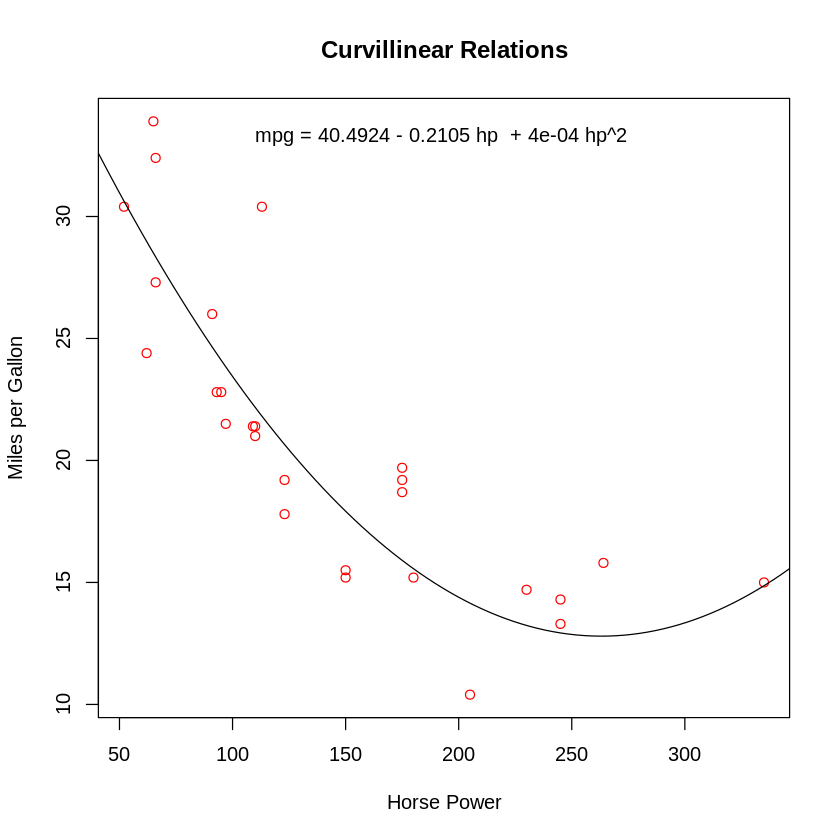

In [36]:
# Plot the line of regression
plot(mpg ~ hp, data = train, col="red", xlab='Horse Power', ylab='Miles per Gallon', main='Curvillinear Relations')
curve((bs[1]+bs[2]*x+bs[3]*x^2), from=0, to = 350, add=TRUE)

mtext(msg, 3, line=-2) 

In [37]:
#predicting model on test data
result <- predict.lm(curvilinear, data.frame(hp = test$hp, hp2 = test$hp2))
cat("Predicted\tActual\n")
for(i in 1:nrow(test)) {
    cat(result[i], "\t" ,test$mpg[i], "\n")
}

Predicted	Actual
22.31634 	 21 
22.92628 	 18.1 
15.93941 	 16.4 
15.93941 	 17.3 
14.26459 	 10.4 


In [38]:
#RMSE error
cat("RMSE: ", sqrt(mean((test$mpg - result)**2)))

RMSE:  2.899109

 Power Curve Regression

In [39]:
# Apply the lm() function.
power <- lm(log(mpg) ~ wt, data=train)
power

bs <- round(exp(coef(power)), 3)
msg <- paste0("mpg = ", bs[1], " * ", abs(bs[2]), "^wt ")

cat("\nRelationship:  ")
cat(msg)


Call:
lm(formula = log(mpg) ~ wt, data = train)

Coefficients:
(Intercept)           wt  
     3.8363      -0.2742  



Relationship:  mpg = 46.352 * 0.76^wt 

In [40]:
#view results of model
summary(power)


Call:
lm(formula = log(mpg) ~ wt, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20694 -0.09413 -0.01051  0.08539  0.31735 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.83626    0.09927  38.645  < 2e-16 ***
wt          -0.27423    0.03078  -8.908 3.13e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1483 on 25 degrees of freedom
Multiple R-squared:  0.7604,	Adjusted R-squared:  0.7509 
F-statistic: 79.36 on 1 and 25 DF,  p-value: 3.133e-09


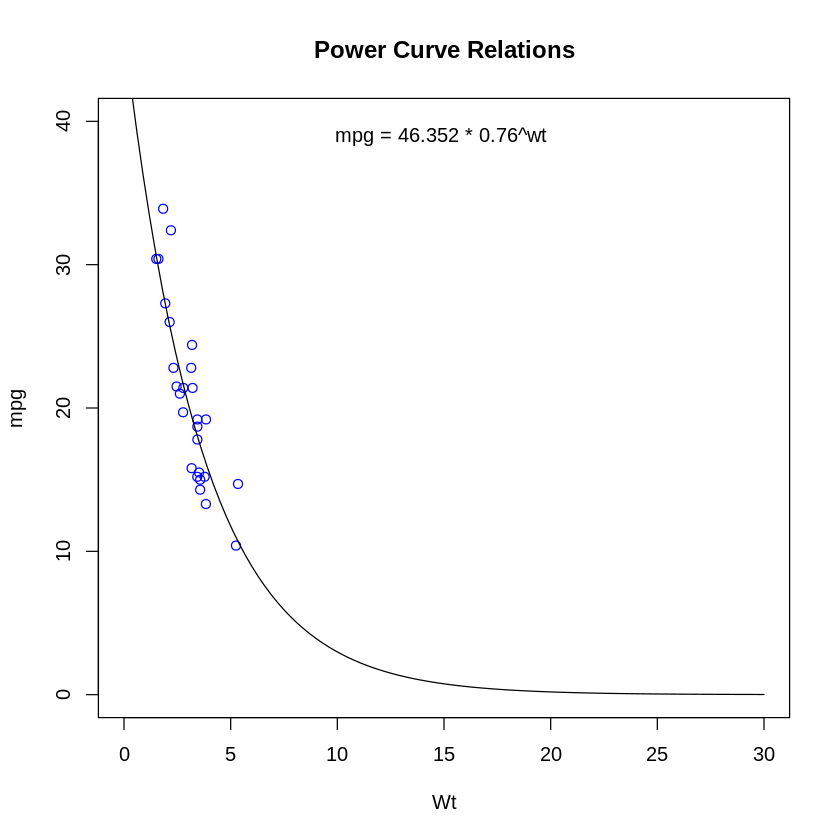

In [41]:
plot(mpg ~ wt, data = train, col="blue", main='Power Curve Relations', xlab = "Wt",ylab = "mpg", xlim=c(0,30), ylim=c(0,40))
curve(bs[1]*(bs[2]^x), from=0, to=30, add=TRUE)

mtext(msg, 3, line=-2) 

In [42]:
#predicting model on test data
result <- exp(predict.lm(power, data.frame(wt = test$wt)))
cat("Predicted\tActual\n")
for(i in 1:nrow(test)) {
    cat(result[i], "\t" ,test$mpg[i], "\n")
}

Predicted	Actual
21.07003 	 21 
17.94707 	 18.1 
15.18254 	 16.4 
16.66623 	 17.3 
10.47339 	 10.4 


In [43]:
#RMSE error
cat("RMSE: ", sqrt(mean((test$mpg - result)**2)))

RMSE:  0.6192832

Lasso and Ridge Regression

In [44]:
#taking only useful column
x_train <- data.matrix(train[, c('disp', 'hp', 'drat')])
y_train <- train$mpg

x_test <- data.matrix(test[, c('disp', 'hp', 'drat')])
y_test <- test$mpg

In [45]:
# Apply the losso ridge function with cv to find best lambda.
ridge <- cv.glmnet(x_train, y_train, alpha=0)
ridge_lambda <- ridge$lambda.min
ridge_lambda

lasso <- cv.glmnet(x_train, y_train, alpha=1)
lasso_lambda <- lasso$lambda.min
lasso_lambda

ERROR: ignored

In [46]:
#produce plot of test MSE by lambda value
plot(lasso) 

ERROR: ignored